<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(_1_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.2_n20.csv',
 'data_multi_delta_-1.2_n30.csv',
 'data_multi_delta_-1.2_n60.csv',
 'data_multi_delta_-1.2_n120.csv',
 'data_multi_delta_-1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,62.232586,45.844166,0.035777,118.112529,118.089617,0.022912
1,0.0,1.0,56.333542,90.367194,-0.033223,156.667513,156.721111,-0.053598
2,0.0,2.0,27.095136,76.990916,-0.032797,114.053255,114.063488,-0.010233
3,0.0,3.0,21.536681,93.005642,-0.033202,124.509122,124.517952,-0.008830
4,0.0,4.0,52.129420,84.915468,-0.037030,147.007858,147.057880,-0.050022
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,47.052926,54.167064,-0.030292,111.189698,111.227016,-0.037317
29996,999.0,26.0,68.142780,48.977294,0.045920,127.165995,127.131127,0.034868
29997,999.0,27.0,28.211436,25.015167,0.014210,63.240812,63.177284,0.063528
29998,999.0,28.0,59.793816,38.371903,0.055676,108.221394,108.155414,0.065980


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,62.232586,45.844166,0.035777,118.112529,118.089617,0.022912
1,0.0,1.0,56.333542,90.367194,-0.033223,156.667513,156.721111,-0.053598
2,0.0,2.0,27.095136,76.990916,-0.032797,114.053255,114.063488,-0.010233
3,0.0,3.0,21.536681,93.005642,-0.033202,124.509122,124.517952,-0.008830
4,0.0,4.0,52.129420,84.915468,-0.037030,147.007858,147.057880,-0.050022
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,47.052926,54.167064,-0.030292,111.189698,111.227016,-0.037317
29996,999.0,26.0,68.142780,48.977294,0.045920,127.165995,127.131127,0.034868
29997,999.0,27.0,28.211436,25.015167,0.014210,63.240812,63.177284,0.063528
29998,999.0,28.0,59.793816,38.371903,0.055676,108.221394,108.155414,0.065980


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    62.232586  45.844166  0.035777  118.112529  118.089617  0.022912
      1.0    56.333542  90.367194 -0.033223  156.667513  156.721111 -0.053598
      2.0    27.095136  76.990916 -0.032797  114.053255  114.063488 -0.010233
      3.0    21.536681  93.005642 -0.033202  124.509122  124.517952 -0.008830
      4.0    52.129420  84.915468 -0.037030  147.007858  147.057880 -0.050022
...                ...        ...       ...         ...         ...       ...
999.0 25.0   47.052926  54.167064 -0.030292  111.189698  111.227016 -0.037317
      26.0   68.142780  48.977294  0.045920  127.165995  127.131127  0.034868
      27.0   28.211436  25.015167  0.014210   63.240812   63.177284  0.063528
      28.0   59.793816  38.371903  0.055676  108.221394  108.155414  0.065980
      29.0   93.298485  75.652592 -0.006260  178.944817  179.018239 -0.073422

[30000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    62.232586  45.844166  0.035777  118.112529  118.089617  0.022912
      1.0    56.333542  90.367194 -0.033223  156.667513  156.721111 -0.053598
      2.0    27.095136  76.990916 -0.032797  114.053255  114.063488 -0.010233
      3.0    21.536681  93.005642 -0.033202  124.509122  124.517952 -0.008830
      4.0    52.129420  84.915468 -0.037030  147.007858  147.057880 -0.050022
...                ...        ...       ...         ...         ...       ...
999.0 25.0   47.052926  54.167064 -0.030292  111.189698  111.227016 -0.037317
      26.0   68.142780  48.977294  0.045920  127.165995  127.131127  0.034868
      27.0   28.211436  25.015167  0.014210   63.240812   63.177284  0.063528
      28.0   59.793816  38.371903  0.055676  108.221394  108.155414  0.065980
      29.0   93.298485  75.652592 -0.006260  178.944817  179.018239 -0.073422

[30000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,62.232586,45.844166,0.035777,118.112529,118.089617,0.022912
1,0.0,1.0,56.333542,90.367194,-0.033223,156.667513,156.721111,-0.053598
2,0.0,2.0,27.095136,76.990916,-0.032797,114.053255,114.063488,-0.010233
3,0.0,3.0,21.536681,93.005642,-0.033202,124.509122,124.517952,-0.008830
4,0.0,4.0,52.129420,84.915468,-0.037030,147.007858,147.057880,-0.050022
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,47.052926,54.167064,-0.030292,111.189698,111.227016,-0.037317
29996,999.0,26.0,68.142780,48.977294,0.045920,127.165995,127.131127,0.034868
29997,999.0,27.0,28.211436,25.015167,0.014210,63.240812,63.177284,0.063528
29998,999.0,28.0,59.793816,38.371903,0.055676,108.221394,108.155414,0.065980


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    62.232586  45.844166  0.035777  118.112529  118.089617  0.022912
      1.0    56.333542  90.367194 -0.033223  156.667513  156.721111 -0.053598
      2.0    27.095136  76.990916 -0.032797  114.053255  114.063488 -0.010233
      3.0    21.536681  93.005642 -0.033202  124.509122  124.517952 -0.008830
      4.0    52.129420  84.915468 -0.037030  147.007858  147.057880 -0.050022
...                ...        ...       ...         ...         ...       ...
999.0 25.0   47.052926  54.167064 -0.030292  111.189698  111.227016 -0.037317
      26.0   68.142780  48.977294  0.045920  127.165995  127.131127  0.034868
      27.0   28.211436  25.015167  0.014210   63.240812   63.177284  0.063528
      28.0   59.793816  38.371903  0.055676  108.221394  108.155414  0.065980
      29.0   93.298485  75.652592 -0.006260  178.944817  179.018239 -0.073422

[30000 rows x 6 columns]

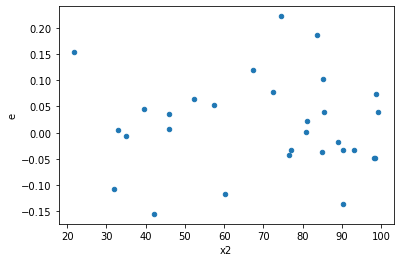

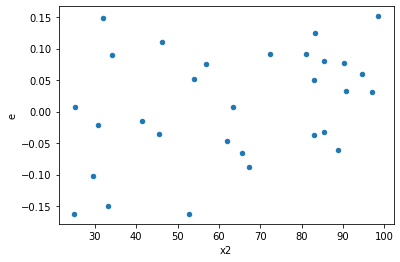

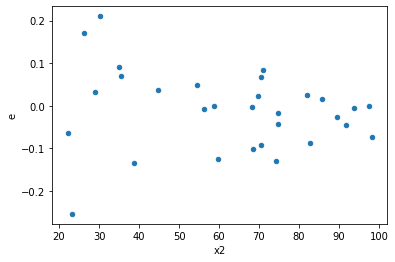

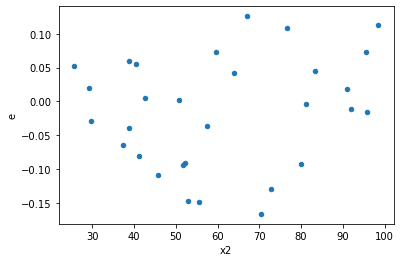

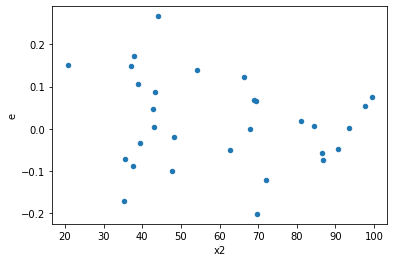

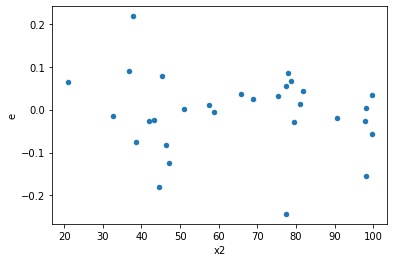

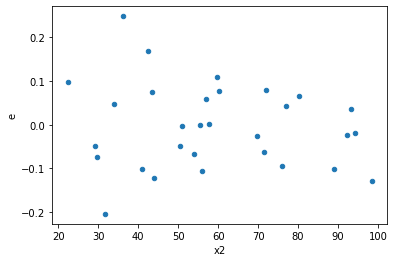

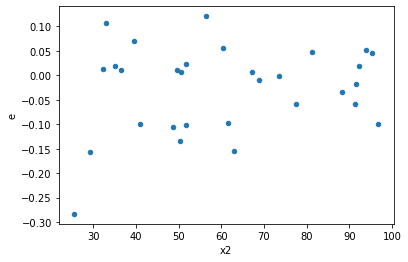

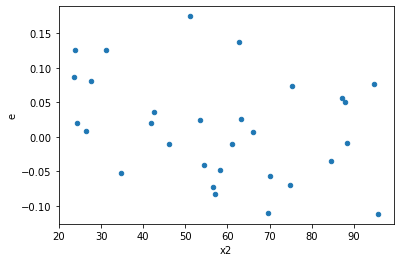

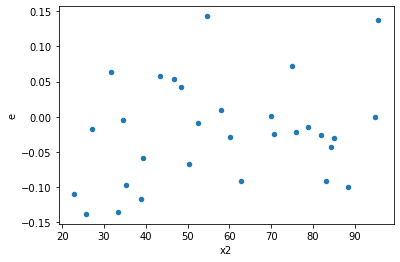

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
6.0,10.0,10.0,0.06755180265651299,0.0742765687635396,0.006755180265651299,0.007427656876353959,1.0995497654033106,0.8836641639466116,0.5581679180266942,0.4418320819733058,Reject001=1 : Homoscedasticity
10.0,10.0,10.0,0.036165252739252106,0.08152567865667674,0.0036165252739252104,0.008152567865667674,2.2542543596879807,0.21597814400823356,0.8920109279958832,0.10798907200411678,Reject001=1 : Homoscedasticity
27.0,10.0,10.0,0.05923219971181623,0.0652781526381049,0.005923219971181623,0.006527815263810489,1.1020720647840898,0.8808770901899547,0.5595614549050226,0.4404385450949774,Reject001=1 : Homoscedasticity
28.0,10.0,10.0,0.03171947841711073,0.07996411489285357,0.003171947841711073,0.007996411489285357,2.5209782406042907,0.16081320963329593,0.919593395183352,0.08040660481664796,Reject001=1 : Homoscedasticity
29.0,10.0,10.0,0.059882709893608624,0.07352041627353932,0.005988270989360863,0.007352041627353932,1.2277403010678758,0.7518929302634922,0.6240535348682539,0.3759464651317461,Reject001=1 : Homoscedasticity
40.0,10.0,10.0,0.08318800525115326,0.1221899806024764,0.008318800525115326,0.01221899806024764,1.4688413339588096,0.554414481908106,0.722792759045947,0.277207240954053,Reject001=1 : Homoscedasticity
42.0,10.0,10.0,0.029313506393272314,0.03644033688479167,0.0029313506393272314,0.0036440336884791666,1.2431244626932456,0.7374015814900956,0.6312992092549522,0.3687007907450478,Reject001=1 : Homoscedasticity
43.0,10.0,10.0,0.026331060533783604,0.04922934714948377,0.0026331060533783604,0.004922934714948377,1.869630244718815,0.33831869489710087,0.8308406525514496,0.16915934744855043,Reject001=1 : Homoscedasticity
54.0,10.0,10.0,0.03831787175771752,0.08324499148921997,0.003831787175771752,0.008324499148921997,2.1724847354669112,0.237054517384377,0.8814727413078115,0.1185272586921885,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,10.0,0.04076584744516043,0.039424121721382994,0.004076584744516043,0.0039424121721382994,0.9670870150416383,0.9588393538104241,Reject001=1 : Homoscedasticity
1.0,10.0,10.0,0.09124387945472874,0.02844165104929275,0.009124387945472875,0.002844165104929275,0.31171023436595835,0.07984859486723568,Reject001=1 : Homoscedasticity
2.0,10.0,10.0,0.17956731453895722,0.0325801953378753,0.017956731453895723,0.0032580195337875303,0.1814372254857496,0.012494591393042402,Reject001=1 : Homoscedasticity
3.0,10.0,10.0,0.07991896328907688,0.07797803949609365,0.007991896328907688,0.007797803949609365,0.9757138517179876,0.9697554109388937,Reject001=1 : Homoscedasticity
4.0,10.0,10.0,0.16462261048857008,0.05969298727683769,0.016462261048857008,0.005969298727683769,0.36260503402102373,0.12514520673474244,Reject001=1 : Homoscedasticity
5.0,10.0,10.0,0.08045914321950176,0.01959894210278651,0.008045914321950176,0.001959894210278651,0.24358874974989916,0.03586137655922307,Reject001=1 : Homoscedasticity
6.0,10.0,10.0,0.06755180265651299,0.0742765687635396,0.006755180265651299,0.007427656876353959,1.0995497654033106,0.8836641639466116,Reject001=1 : Homoscedasticity
7.0,10.0,10.0,0.06114629474166583,0.03730485031028234,0.006114629474166583,0.003730485031028234,0.6100917556474991,0.44825372757210163,Reject001=1 : Homoscedasticity
8.0,10.0,10.0,0.06602165282515825,0.04203394850339215,0.006602165282515825,0.004203394850339215,0.6366691336054323,0.4880287141684531,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      916
Reject001=0 : Heteroscedasticity     84
Name: Result_test, dtype: int64